# Return Rate Analysis and Prediction

## Step 1: Data Loading and Exploration

In this step, we will load the data from the provided CSV files and explore their contents to understand the structure, identify missing values, and spot any anomalies that might need addressing.


In [66]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the datasets
orders_df = pd.read_csv('orders.csv')
line_items_df = pd.read_csv('line_items.csv')
customers_df = pd.read_csv('customers.csv')

# Displaying the first few rows of each dataset to understand their structure
print("Orders Data:")
print(orders_df.head())
print("\nLine Items Data:")
print(line_items_df.head())
print("\nCustomers Data:")
print(customers_df.head())


Orders Data:
   order_id                      customer_uid          order_timestamp  \
0     38831  a6730d49e0989b2cc0158c6182fafb93  2015-11-30 05:03:15.159   
1     45499  ae2e8c1fa5326e1f793d4c02f720156c  2015-11-30 19:52:10.830   
2     69415  ba200839cd304b8342f8c5d0eb4d7c75  2015-12-02 22:54:40.380   
3     68761  b34cf44effba2eeb4d2a4db55ffe49d7  2015-12-02 20:24:30.925   
4    120057  10cedfe0d36280b646ff877ac1d916cb  2015-12-07 22:59:26.486   

   discount ship_state  shipping_revenue  shipping_cost  returned  
0      0.00         FL              0.00            6.8     False  
1      0.00         TN              5.95            6.8      True  
2      0.00         TN              0.00            6.8     False  
3      0.00         MI              0.00            6.8     False  
4      0.04         OH              0.00            6.8     False  

Line Items Data:
   line_item_id  order_id  quantity  selling_price  supplier_cost  \
0    1073625002  31323782         1           9

## Step 2: Data Preprocessing

This step involves cleaning the data, handling missing values, and merging datasets to create a comprehensive dataset that includes order details, line items, and customer information.


In [67]:
# Checking for missing values in each dataset
print("Missing values in Orders Data:")
print(orders_df.isnull().sum())
print("\nMissing values in Line Items Data:")
print(line_items_df.isnull().sum())
print("\nMissing values in Customers Data:")
print(customers_df.isnull().sum())

# Merging the datasets on relevant keys
# Merging orders with line items
merged_df = pd.merge(orders_df, line_items_df, on='order_id', how='left')

# Merging with customer data
final_df = pd.merge(merged_df, customers_df, on='customer_uid', how='left')
final_df.shape

Missing values in Orders Data:
order_id            0
customer_uid        0
order_timestamp     0
discount            0
ship_state          0
shipping_revenue    0
shipping_cost       0
returned            0
dtype: int64

Missing values in Line Items Data:
line_item_id         0
order_id             0
quantity             0
selling_price       22
supplier_cost       20
product_category     0
color                0
size                 0
dtype: int64

Missing values in Customers Data:
customer_uid           0
is_business            0
has_account            0
bill_state             6
acquisition_channel    0
dtype: int64


(373879, 19)

In [68]:
# Replacing missing 'bill_state' values with 'ship_state' values
final_df['bill_state'] = final_df['bill_state'].fillna('missing')

# Checking if there are any remaining missing values in 'bill_state'
missing_bill_state = final_df['bill_state'].isnull().sum()
print(f"Missing values in 'bill_state' after imputation: {missing_bill_state}")

Missing values in 'bill_state' after imputation: 0


In [69]:
# Filtering rows where either 'selling_price' or 'supplier_cost' is NaN
nan_rows = final_df[final_df['selling_price'].isnull() | final_df['supplier_cost'].isnull()]
nan_rows

,order_id,customer_uid,order_timestamp,discount,ship_state,shipping_revenue,shipping_cost,returned,line_item_id,quantity,selling_price,supplier_cost,product_category,color,size,is_business,has_account,bill_state,acquisition_channel
2916,1728341,d5c9584c55b4c9cbc3482e823f73dbfe,2016-07-19 19:43:56.583,0.000,ND,7.95,7.09,False,6.002749e+09,1.0,NaN,NaN,OTHER,WHITE,OTHER,True,False,ND,paid search
3305,2189828,02806bfec02917f09999ffaa887f5763,2016-09-26 16:35:07.435,0.000,ND,7.95,7.09,False,6.003846e+09,1.0,NaN,NaN,OTHER,WHITE,OTHER,True,False,ND,paid search
25875,6419048,2976da5dc30dd8375dff8fe7135ac931,2017-09-29 00:57:32.286,0.075,NC,0.00,7.09,False,1.012780e+09,1.0,NaN,NaN,OTHER,BLUE,2XL,True,True,GA,paid search
25886,6419048,2976da5dc30dd8375dff8fe7135ac931,2017-09-29 00:57:32.286,0.075,NC,0.00,7.09,False,1.012780e+09,1.0,NaN,NaN,OTHER,BLUE,XL,True,True,GA,paid search
29618,8793675,a79ae436cb8c3558c74746aa362f87ba,2018-03-12 17:38:24.124,0.000,FL,0.00,7.39,False,5.018965e+09,1.0,NaN,NaN,OTHER,COLOR,3XL,True,True,FL,paid search
63449,10271271,261715c73cc5781148851f9fb3d047ec,2018-06-07 00:03:41.448,0.075,FL,0.00,7.39,False,9.022901e+09,4.0,NaN,NaN,OTHER,COLOR,3XL,False,False,FL,direct
63455,10271271,261715c73cc5781148851f9fb3d047ec,2018-06-07 00:03:41.448,0.075,FL,0.00,7.39,False,5.022901e+09,1.0,NaN,NaN,OTHER,COLOR,OTHER,False,False,FL,direct
63456,10271271,261715c73cc5781148851f9fb3d047ec,2018-06-07 00:03:41.448,0.075,FL,0.00,7.39,False,5.022901e+09,2.0,NaN,NaN,OTHER,COLOR,XL,False,False,FL,direct
63457,10271271,261715c73cc5781148851f9fb3d047ec,2018-06-07 00:03:41.448,0.075,FL,0.00,7.39,False,5.022901e+09,1.0,NaN,NaN,OTHER,COLOR,2XL,False,False,FL,direct
63458,10271271,261715c73cc5781148851f9fb3d047ec,2018-06-07 00:03:41.448,0.075,FL,0.00,7.39,False,5.022901e+09,3.0,NaN,NaN,OTHER,COLOR,4XL,False,False,FL,direct


In [70]:
# Remove rows where either 'selling_price' or 'supplier_cost' is NaN
final_df = final_df.dropna(subset=['selling_price', 'supplier_cost'])

# Check the shape of the dataframe after removal
print("Dataframe shape after removing NaN rows:", final_df.shape)


Dataframe shape after removing NaN rows: (373856, 19)


## Step 3: Feature Engineering and Selection

In this step, we will create additional features that might be relevant for predicting returns and select the most relevant features for our model.


In [71]:
import pandas as pd

# Convert 'order_timestamp' to datetime once at the top
final_df['order_timestamp'] = pd.to_datetime(final_df['order_timestamp'])

# Feature engineering
final_df['total_order_value'] = final_df['quantity'] * final_df['selling_price']
final_df['order_hour'] = final_df['order_timestamp'].dt.hour
final_df['order_month'] = final_df['order_timestamp'].dt.month
final_df['order_quarter'] = final_df['order_timestamp'].dt.quarter
final_df['average_discount'] = final_df.groupby('customer_uid')['discount'].transform('mean')

# Calculate time since first purchase
first_purchase = final_df.groupby('customer_uid')['order_timestamp'].transform('min')
final_df['time_since_first_purchase'] = (final_df['order_timestamp'] - first_purchase).dt.days

# Order complexity based on unique line items
final_df['order_complexity'] = final_df.groupby('order_id')['line_item_id'].transform('nunique')

# Checking if billing and shipping states are different
final_df['states_different'] = final_df['bill_state'] != final_df['ship_state']

# Sorting DataFrame by 'order_timestamp'
final_df = final_df.sort_values(by='order_timestamp')


# Initialize the return history column with zeros
final_df['return_history'] = 0

# Group by 'customer_uid' and calculate cumulative sum of 'returned' for each group
cumulative_returns = final_df.groupby('customer_uid')['returned'].cumsum()

# Subtract the current 'returned' value from the cumulative sum to avoid leakage
# This makes sure the current order is not included in the return history
cumulative_returns -= final_df['returned']

# Shift the cumulative returns by 1, filling the first occurrence with zero
# This ensures that the return history is calculated up to the previous order
final_df['return_history'] = cumulative_returns.groupby(final_df['customer_uid']).shift(fill_value=0)
    
# Selecting features for the model
features = ['discount', 'shipping_revenue', 'shipping_cost', 
            'quantity', 'selling_price', 'supplier_cost', 'product_category', 'color', 'size',
            'is_business', 'has_account', 'states_different', 'acquisition_channel', 'total_order_value',
            'order_hour', 'order_month', 'order_quarter','average_discount', 'time_since_first_purchase',
            'return_history',
            'order_complexity',  'returned']
model_df = final_df[features]



In [72]:
import pandas as pd

def optimize_data_types(df):
    # Downcasting numeric columns
    numeric_int_cols = df.select_dtypes(include=['int']).columns
    numeric_float_cols = df.select_dtypes(include=['float']).columns
    object_cols = df.select_dtypes(include=['object']).columns

    df_optimized = df.copy()
    
    for col in numeric_int_cols:
        df_optimized[col] = pd.to_numeric(df_optimized[col], downcast='integer')

    for col in numeric_float_cols:
        df_optimized[col] = pd.to_numeric(df_optimized[col], downcast='float')

    # Converting objects to categories
    for col in object_cols:
        if df_optimized[col].nunique() / df_optimized[col].shape[0] < 0.5:  # Adjust threshold as needed
            df_optimized[col] = df_optimized[col].astype('category')

    # Optimizing Boolean columns
    for col in df_optimized.columns:
        if pd.api.types.is_object_dtype(df_optimized[col]):
            unique_vals = df_optimized[col].unique()
            if set(unique_vals) <= {True, False, None}:  # Adjust based on your data
                df_optimized[col] = df_optimized[col].astype('bool')

    # Handling dates (modify as per your date columns)
    # df_optimized['date_column'] = pd.to_datetime(df_optimized['date_column'])

    return df_optimized

# Apply the function to your DataFrame
original_mem = model_df.memory_usage(deep=True).sum()
model_df_optimized = optimize_data_types(model_df)
optimized_mem = model_df_optimized.memory_usage(deep=True).sum()

print(f"Original Memory Usage: {original_mem / 1024**2:.2f} MB")
print(f"Optimized Memory Usage: {optimized_mem / 1024**2:.2f} MB")


Original Memory Usage: 118.93 MB
Optimized Memory Usage: 20.33 MB


## Step 4: Model Building

In this step, we will split the data into training and test sets, choose a suitable model for predicting returns, train the model, and make predictions.

In [82]:
# Importing machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


#splitting based on a proportion of the dataset (remember its ordered by timestamp)
split_index = int(len(model_df_optimized) * 0.8) 
train_df = model_df_optimized.iloc[:split_index]
test_df = model_df_optimized.iloc[split_index:]

# Features and Labels
X_train = train_df.drop(['returned'], axis=1)
y_train = train_df['returned']
X_test = test_df.drop(['returned'], axis=1)
y_test = test_df['returned']

# Converting categorical variables to dummy variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns of train and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Building the model
rf_classifier = RandomForestClassifier(n_estimators=3000, random_state=42, class_weight='balanced', max_depth= None, min_samples_split = 20)
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.98      0.97     68995
        True       0.67      0.42      0.52      5777

    accuracy                           0.94     74772
   macro avg       0.81      0.70      0.74     74772
weighted avg       0.93      0.94      0.93     74772


Confusion Matrix:
[[67783  1212]
 [ 3329  2448]]


- Non-Returned Orders ("False"):

Our model shows a precision of 95% here, meaning it's accurate in identifying non-returned orders most of the time.
The recall is high at 98%, which is great because it means we're capturing almost all non-returned orders.
The F1-Score is 97%.
This category includes 68,995 orders.

- Returned Orders ("True"):

Precision is lower at 67%, so when the model predicts an order will be returned, it's right about two-thirds of the time.
The recall is 42%, suggesting we're missing a significant number of actual returns.
With an F1-Score of 52%, there's clearly room for improvement in predicting returns.
This represents 5,777 orders.

- Overall Performance:

Our model's overall accuracy is 94%.
The Macro and Weighted Average F1-Scores are 74% and 93%, respectively.

- Confusion Matrix Details:

The model correctly identified 'Non-Returned' 67,783 times but incorrectly labeled 1,212 actual returns as 'Non-Returned'.
For 'Returned', it correctly identified 2,448 but missed 3,329, labeling them as 'Non-Returned'.

- Baseline Comparison:

If we were to assume that no orders are returned (a naive baseline), we'd be right 92.27% of the time, given that 92.27% of orders in our dataset are actually not returned.
Our model's accuracy of 94% is an improvement over this baseline, but it's mainly driven by its strong performance in predicting the more common class of non-returned orders.
In summary, while our model outperforms the simple baseline of assuming no returns, its ability to correctly identify returned orders needs enhancement. We're doing well on the non-returned front, but better identifying returns will make the model more robust.

In [84]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [2000],
    'max_depth': [None, 30, 60],
    'min_samples_split': [20, 40, 80]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, scoring='f1_macro')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Build the model with the best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train, y_train)

# Making predictions with the tuned model
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
print("Updated Classification Report:")
print(classification_report(y_test, y_pred))
print("\nUpdated Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_split': 80, 'n_estimators': 2000}
Updated Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.93      0.95     68995
        True       0.45      0.66      0.54      5777

    accuracy                           0.91     74772
   macro avg       0.71      0.80      0.74     74772
weighted avg       0.93      0.91      0.92     74772


Updated Confusion Matrix:
[[64448  4547]
 [ 1987  3790]]


## Step 5: Model Evaluation and Interpretation

In this final step, we will evaluate the performance of our model and interpret the results to understand the factors influencing product returns.


Feature Importances:
1. feature return_history (0.4794)
2. feature time_since_first_purchase (0.0820)
3. feature average_discount (0.0687)
4. feature order_complexity (0.0592)
5. feature order_hour (0.0389)
6. feature shipping_cost (0.0334)
7. feature order_month (0.0289)
8. feature selling_price (0.0281)
9. feature supplier_cost (0.0259)
10. feature total_order_value (0.0234)
11. feature discount (0.0185)
12. feature has_account (0.0138)
13. feature order_quarter (0.0126)
14. feature shipping_revenue (0.0113)
15. feature quantity (0.0082)
16. feature is_business (0.0078)
17. feature acquisition_channel_paid search (0.0067)
18. feature product_category_Fashion Tee (0.0047)
19. feature acquisition_channel_direct (0.0042)
20. feature product_category_OTHER (0.0040)
21. feature color_COLOR (0.0033)
22. feature size_OTHER (0.0027)
23. feature color_HEATHER (0.0026)
24. feature color_WHITE (0.0025)
25. feature color_GRAY (0.0024)
26. feature color_RED (0.0022)
27. feature size_L (0.0022)
28

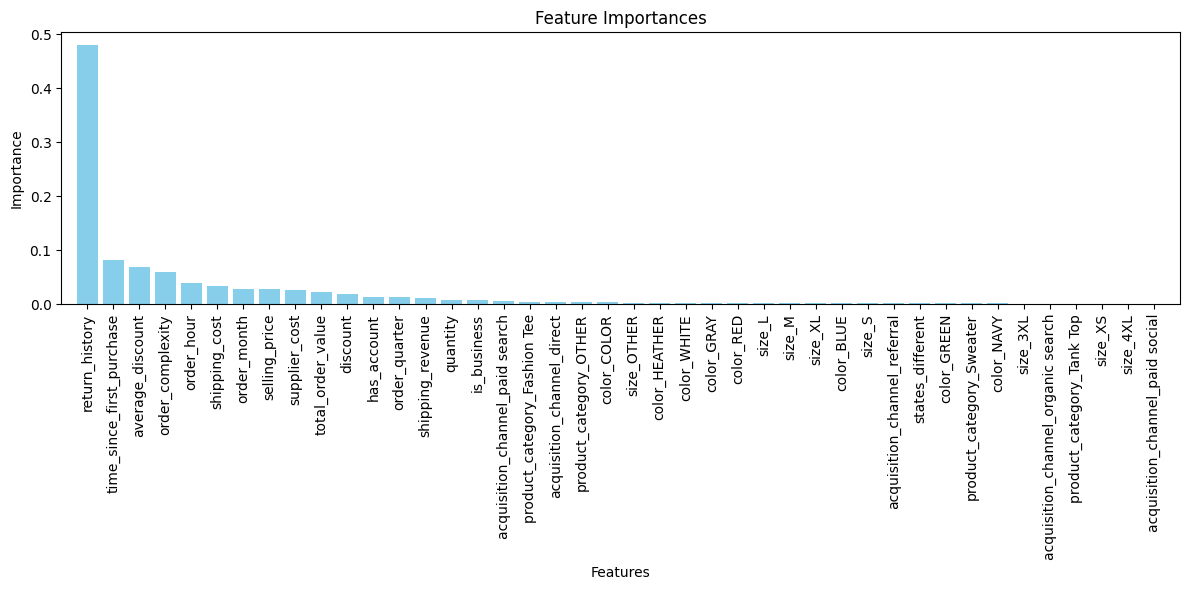

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Feature Importance Analysis
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns  # Ensure to use X_train after alignment

# Printing Feature Importances
print("Feature Importances:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({importances[indices[f]]:.4f})")  # Rounded to 4 decimal places for readability

# Plotting Feature Importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color='skyblue', align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Features')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()